In [15]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest

os.chdir('D:\\Users\\Diogo\\Documents\\Pós Graduação\\Módulos\\TCC\\DataSets\\Futebol Brasileiro')

In [16]:
#Carregando os dados do Data Frame

df_dados=pd.read_csv('dados_tratados.csv',sep=',')
df_dados.head()

,Unnamed: 0,ID,campeonato,rodata,data,clube_mandante,clube_visitante,qtd_cartao_amarelo_mandante,qtd_cartao_amarelo_visitante,qtd_cartao_vermelho_mandante,qtd_cartao_vermelho_visitante,total_cartoes_mandante,total_cartoes_visitante,total_cartoes_vermelhos,total_cartoes_amarelos,total_cartoes_partida,faltas_mandante,faltas_visitante,total_faltas_partida
0,0,4987,13,1,9/5/2015,Chapecoense,Coritiba,2,2,0,0,2,2,0,4,4,20,21,41
1,1,4988,13,1,9/5/2015,Palmeiras,Atletico-MG,2,4,0,0,2,4,0,6,6,20,14,34
2,2,4989,13,1,9/5/2015,Fluminense,Joinville,2,1,0,1,2,2,1,3,4,9,14,23
3,3,4990,13,1,10/5/2015,Gremio,Ponte Preta,3,5,0,1,3,6,1,8,9,17,21,38
4,4,4991,13,1,10/5/2015,Athletico-PR,Internacional,1,2,0,0,1,2,0,3,3,17,17,34


# IDENTIFICANDO CLÁSSICOS REGIONAIS

In [17]:
#Coletando os clubes e jogando para os Dataframes df_clubes

df_clubes=df_dados.groupby(['clube_mandante']).size().reset_index()
df_clubes=df_clubes[['clube_mandante']]
df_clubes

,clube_mandante
0,America-MG
1,Athletico-PR
2,Atletico-GO
3,Atletico-MG
4,Avai
5,Bahia
6,Botafogo-RJ
7,Bragantino
8,CSA
9,Ceara


In [85]:
#Salvando o Dataframe em um diretório local

df_clubes.to_csv('D:\\Users\\Diogo\\Documents\\Pós Graduação\\Módulos\\TCC\\DataSets\\Futebol Brasileiro\\clubes.csv')

In [18]:
#Carregando o Dataframe com os clássicos regionais

df_classicos=pd.read_csv('df_classicos_regionais.csv',sep=';')
df_classicos

,Time 1,Time 2,Unnamed: 2
0,America-MG,Cruzeiro,NaN
1,America-MG,Atletico-MG,NaN
2,Athletico-PR,Coritiba,NaN
3,Athletico-PR,Parana,NaN
4,Atletico-GO,Goias,NaN
5,Atletico-MG,Cruzeiro,NaN
6,Atletico-MG,America-MG,NaN
7,Avai,Figueirense,NaN
8,Avai,Joinville,NaN
9,Avai,Chapecoense,NaN


In [19]:
#Criando a coluna chave_classico no Dataframe df_dados

df_dados['chave_classico']=df_dados['clube_mandante']+df_dados['clube_visitante']
df_dados.head()

,Unnamed: 0,ID,campeonato,rodata,data,clube_mandante,clube_visitante,qtd_cartao_amarelo_mandante,qtd_cartao_amarelo_visitante,qtd_cartao_vermelho_mandante,qtd_cartao_vermelho_visitante,total_cartoes_mandante,total_cartoes_visitante,total_cartoes_vermelhos,total_cartoes_amarelos,total_cartoes_partida,faltas_mandante,faltas_visitante,total_faltas_partida,chave_classico
0,0,4987,13,1,9/5/2015,Chapecoense,Coritiba,2,2,0,0,2,2,0,4,4,20,21,41,ChapecoenseCoritiba
1,1,4988,13,1,9/5/2015,Palmeiras,Atletico-MG,2,4,0,0,2,4,0,6,6,20,14,34,PalmeirasAtletico-MG
2,2,4989,13,1,9/5/2015,Fluminense,Joinville,2,1,0,1,2,2,1,3,4,9,14,23,FluminenseJoinville
3,3,4990,13,1,10/5/2015,Gremio,Ponte Preta,3,5,0,1,3,6,1,8,9,17,21,38,GremioPonte Preta
4,4,4991,13,1,10/5/2015,Athletico-PR,Internacional,1,2,0,0,1,2,0,3,3,17,17,34,Athletico-PRInternacional


In [20]:
#Criando a coluna chave_classico no Dataframe df_classicos

df_classicos['chave_classico']=df_classicos['Time 1']+df_classicos['Time 2']
df_classicos.head()

,Time 1,Time 2,Unnamed: 2,chave_classico
0,America-MG,Cruzeiro,NaN,America-MGCruzeiro
1,America-MG,Atletico-MG,NaN,America-MGAtletico-MG
2,Athletico-PR,Coritiba,NaN,Athletico-PRCoritiba
3,Athletico-PR,Parana,NaN,Athletico-PRParana
4,Atletico-GO,Goias,NaN,Atletico-GOGoias


In [21]:
#Criando a coluna classico_regional

df_dados['classico_regional'] = df_dados.apply(lambda row: 
    1 if (row['chave_classico'] in df_classicos['chave_classico'].values) else 0, axis=1)

In [22]:
#Conferindo a coluna
df_dados[df_dados.classico_regional==1]

,Unnamed: 0,ID,campeonato,rodata,data,clube_mandante,clube_visitante,qtd_cartao_amarelo_mandante,qtd_cartao_amarelo_visitante,qtd_cartao_vermelho_mandante,...,total_cartoes_mandante,total_cartoes_visitante,total_cartoes_vermelhos,total_cartoes_amarelos,total_cartoes_partida,faltas_mandante,faltas_visitante,total_faltas_partida,chave_classico,classico_regional
18,18,5005,13,2,17/5/2015,Ponte Preta,Sao Paulo,1,3,0,...,1,3,0,4,4,15,14,29,Ponte PretaSao Paulo,1
36,36,5023,13,4,31/5/2015,Corinthians,Palmeiras,5,5,0,...,5,5,0,10,10,21,21,42,CorinthiansPalmeiras,1
42,42,5029,13,5,3/6/2015,Chapecoense,Joinville,3,5,0,...,3,5,0,8,8,16,12,28,ChapecoenseJoinville,1
43,43,5030,13,5,3/6/2015,Sao Paulo,Santos,5,3,0,...,5,4,1,8,9,14,15,29,Sao PauloSantos,1
51,51,5039,13,6,6/6/2015,Santos,Ponte Preta,2,2,0,...,2,2,0,4,4,17,15,32,SantosPonte Preta,1
66,66,5054,13,7,14/6/2015,Avai,Figueirense,4,3,0,...,4,3,0,7,7,14,26,40,AvaiFigueirense,1
72,72,5060,13,8,20/6/2015,Santos,Corinthians,5,4,1,...,6,5,2,9,11,19,17,36,SantosCorinthians,1
76,76,5064,13,8,21/6/2015,Athletico-PR,Coritiba,2,5,0,...,2,7,2,7,9,10,20,30,Athletico-PRCoritiba,1
83,83,5071,13,9,28/6/2015,Palmeiras,Sao Paulo,1,3,0,...,1,3,0,4,4,18,14,32,PalmeirasSao Paulo,1
87,87,5075,13,9,28/6/2015,Vasco,Flamengo,4,0,0,...,4,0,0,4,4,18,10,28,VascoFlamengo,1


In [23]:
#Ordenando os registros por ID

df_dados.sort_values(by = ['ID'],ascending=True,inplace=True)
df_dados.head()

,Unnamed: 0,ID,campeonato,rodata,data,clube_mandante,clube_visitante,qtd_cartao_amarelo_mandante,qtd_cartao_amarelo_visitante,qtd_cartao_vermelho_mandante,...,total_cartoes_mandante,total_cartoes_visitante,total_cartoes_vermelhos,total_cartoes_amarelos,total_cartoes_partida,faltas_mandante,faltas_visitante,total_faltas_partida,chave_classico,classico_regional
0,0,4987,13,1,9/5/2015,Chapecoense,Coritiba,2,2,0,...,2,2,0,4,4,20,21,41,ChapecoenseCoritiba,0
1,1,4988,13,1,9/5/2015,Palmeiras,Atletico-MG,2,4,0,...,2,4,0,6,6,20,14,34,PalmeirasAtletico-MG,0
2,2,4989,13,1,9/5/2015,Fluminense,Joinville,2,1,0,...,2,2,1,3,4,9,14,23,FluminenseJoinville,0
3,3,4990,13,1,10/5/2015,Gremio,Ponte Preta,3,5,0,...,3,6,1,8,9,17,21,38,GremioPonte Preta,0
4,4,4991,13,1,10/5/2015,Athletico-PR,Internacional,1,2,0,...,1,2,0,3,3,17,17,34,Athletico-PRInternacional,0


In [24]:
#Reordenando os valores na coluna campeonato

df_dados['campeonato'].replace(13,'2015',inplace=True)
df_dados['campeonato'].replace(14,'2016',inplace=True)
df_dados['campeonato'].replace(15,'2017',inplace=True)
df_dados['campeonato'].replace(16,'2018',inplace=True)
df_dados['campeonato'].replace(17,'2019',inplace=True)
df_dados['campeonato'].replace(18,'2020',inplace=True)
df_dados['campeonato'].replace(19,'2021',inplace=True)
df_dados['campeonato'].replace(20,'2022',inplace=True)

In [25]:
#Conferindo as partidas dos campeonatos

df_dados['campeonato'].value_counts()

2017    380
2021    380
2020    380
2018    380
2015    380
2022    380
2019    380
2016    379
Name: campeonato, dtype: int64

In [26]:
#Salvando o Dataframe par um diretório local

df_dados.to_csv('D:\\Users\\Diogo\\Documents\\Pós Graduação\\Módulos\\TCC\\DataSets\\Futebol Brasileiro\\df_dados_classicos.csv')

In [27]:
#Criando o Dataframe df_dados_temp

df_dados_temp=df_dados.copy(deep=True)

In [28]:
#Alterando os tipos das colunas para float

df_dados_temp['qtd_cartao_amarelo_mandante'] = df_dados_temp['qtd_cartao_amarelo_mandante'].astype(float)
df_dados_temp['qtd_cartao_amarelo_visitante'] = df_dados_temp['qtd_cartao_amarelo_visitante'].astype(float)
df_dados_temp['qtd_cartao_vermelho_mandante'] = df_dados_temp['qtd_cartao_vermelho_mandante'].astype(float)
df_dados_temp['qtd_cartao_vermelho_visitante'] = df_dados_temp['qtd_cartao_vermelho_visitante'].astype(float)

In [29]:
#Conferindo os tipos das colunas

df_dados_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3039 entries, 0 to 2986
Data columns (total 21 columns):
Unnamed: 0                       3039 non-null int64
ID                               3039 non-null int64
campeonato                       3039 non-null object
rodata                           3039 non-null int64
data                             3039 non-null object
clube_mandante                   3039 non-null object
clube_visitante                  3039 non-null object
qtd_cartao_amarelo_mandante      3039 non-null float64
qtd_cartao_amarelo_visitante     3039 non-null float64
qtd_cartao_vermelho_mandante     3039 non-null float64
qtd_cartao_vermelho_visitante    3039 non-null float64
total_cartoes_mandante           3039 non-null int64
total_cartoes_visitante          3039 non-null int64
total_cartoes_vermelhos          3039 non-null int64
total_cartoes_amarelos           3039 non-null int64
total_cartoes_partida            3039 non-null int64
faltas_mandante                  

In [30]:
# Função para calcular a média acumulada das partidas totais
def calcular_media_acumulada_total(serie):
    return serie.shift(1).rolling(1).mean()

# Função para calcular a média acumulada das últimas 5 partidas
def calcular_media_acumulada(serie):
    return serie.shift(1).rolling(5).mean().round(2)

# Aplicar a função para calcular a média acumulada para as colunas de cartões amarelos e vermelhos
df_dados_temp['MedAma5_mandante'] = df_dados_temp.groupby(['campeonato', 'clube_mandante'])['qtd_cartao_amarelo_mandante'].transform(calcular_media_acumulada)
df_dados_temp['MedVer5_mandante'] = df_dados_temp.groupby(['campeonato', 'clube_mandante'])['qtd_cartao_vermelho_mandante'].transform(calcular_media_acumulada)

df_dados_temp['MedAma5_visitante'] = df_dados_temp.groupby(['campeonato', 'clube_visitante'])['qtd_cartao_amarelo_visitante'].transform(calcular_media_acumulada)
df_dados_temp['MedVer5_visitante'] = df_dados_temp.groupby(['campeonato', 'clube_visitante'])['qtd_cartao_vermelho_visitante'].transform(calcular_media_acumulada)

# Calcular a média acumulada por time em todo o campeonato (como mandante e visitante)
df_dados_temp['SomAmaTempMan'] = df_dados_temp.groupby(['campeonato', 'clube_mandante'])['qtd_cartao_amarelo_mandante'].transform('cumsum')
df_dados_temp['SomAmaTempVis'] = df_dados_temp.groupby(['campeonato', 'clube_visitante'])['qtd_cartao_amarelo_visitante'].transform('cumsum')
df_dados_temp['SomAmaTemp'] = df_dados_temp.groupby(['campeonato', 'clube_mandante'])['SomAmaTempMan'].transform('cumsum') + df_dados_temp.groupby(['campeonato', 'clube_visitante'])['SomAmaTempVis'].transform('cumsum')


In [32]:
# Função para calcular a média acumulada das últimas 5 partidas
def calcular_media_acumulada(serie):
    return serie.shift(1).rolling(5).mean().round(2)


# Aplicar a função para calcular a média acumulada para as colunas de cartões amarelos e vermelhos
df_dados_temp['MedAma5_mandante'] = df_dados_temp.groupby(['campeonato', 'clube_mandante'])['qtd_cartao_amarelo_mandante'].transform(calcular_media_acumulada)
df_dados_temp['MedVer5_mandante'] = df_dados_temp.groupby(['campeonato', 'clube_mandante'])['qtd_cartao_vermelho_mandante'].transform(calcular_media_acumulada)

df_dados_temp['MedAma5_visitante'] = df_dados_temp.groupby(['campeonato', 'clube_visitante'])['qtd_cartao_amarelo_visitante'].transform(calcular_media_acumulada)
df_dados_temp['MedVer5_visitante'] = df_dados_temp.groupby(['campeonato', 'clube_visitante'])['qtd_cartao_vermelho_visitante'].transform(calcular_media_acumulada)


In [34]:
# Função para calcular a média por temporada

def calcular_media_amarelo_temporada(campeonato,rodada,clube):
    
    consulta="(campeonato=='{}') and (rodata<{}) and ((clube_mandante=='{}'))".format(campeonato,rodada,clube)
    df_mandante_temp=df_dados_temp.query(consulta)

    if len(df_mandante_temp)>0:
            qtd_mandante = df_mandante_temp.groupby(['clube_mandante'])['qtd_cartao_amarelo_mandante'].transform('sum').reset_index().round(2)
            soma_cartoes_mandante = qtd_mandante.iloc[0,1]
            linhas_mandante=len(df_mandante_temp)
    else:
            soma_cartoes_mandante=0
            linhas_mandante=0
        
    consulta="(campeonato=='{}') and (rodata<{}) and ((clube_visitante=='{}'))".format(campeonato,rodada,clube)
    df_visitante_temp=df_dados_temp.query(consulta)
    if len(df_visitante_temp)>0:
            qtd_visitante = df_visitante_temp.groupby(['clube_visitante'])['qtd_cartao_amarelo_visitante'].transform('sum').reset_index().round(2)
            soma_cartoes_visitante = qtd_visitante.iloc[0,1]
            linhas_visitante=len(df_visitante_temp)

    else:
            soma_cartoes_visitante=0
            linhas_visitante=0

    soma_cartoes= soma_cartoes_mandante + soma_cartoes_visitante
    linhas_df=linhas_mandante + linhas_visitante
    media=0
    if  linhas_df>0:
            media=(soma_cartoes/linhas_df).round(2)

    return media

# Aplicar a função para calcular aa média acumulada por temporada para as colunas de cartões amarelos
df_dados_temp['MedAmaTemp_mandante'] = df_dados_temp.apply(lambda row: calcular_media_amarelo_temporada(row['campeonato'],
                                                            row['rodata'],row['clube_mandante']),axis=1 )

df_dados_temp['MedAmaTemp_visitante'] = df_dados_temp.apply(lambda row: calcular_media_amarelo_temporada(row['campeonato'],
                                                            row['rodata'],row['clube_visitante']),axis=1 )

In [35]:
#Conferindo os dados das colunas criadas

df_teste=df_dados_temp.query("(campeonato=='2015') and (rodata<39) and ((clube_mandante=='Flamengo') or (clube_visitante=='Flamengo'))")
df_teste[['rodata','clube_mandante','clube_visitante','qtd_cartao_amarelo_mandante','qtd_cartao_amarelo_visitante','MedAmaTemp_mandante','MedAmaTemp_visitante']]

,rodata,clube_mandante,clube_visitante,qtd_cartao_amarelo_mandante,qtd_cartao_amarelo_visitante,MedAmaTemp_mandante,MedAmaTemp_visitante
1,1,Palmeiras,Atletico-MG,2.0,4.0,0.00,0.00
17,2,Joinville,Palmeiras,3.0,1.0,1.00,2.00
23,3,Palmeiras,Goias,6.0,5.0,1.50,3.50
36,4,Corinthians,Palmeiras,5.0,5.0,1.67,3.00
49,5,Palmeiras,Internacional,1.0,4.0,3.50,2.75
56,6,Figueirense,Palmeiras,3.0,3.0,3.40,3.00
67,7,Palmeiras,Fluminense,0.0,7.0,3.00,2.00
73,8,Gremio,Palmeiras,4.0,3.0,2.57,2.57
83,9,Palmeiras,Sao Paulo,1.0,3.0,2.62,2.62
91,10,Palmeiras,Chapecoense,0.0,3.0,2.44,2.44


In [36]:
# Função para calcular a média por temporada

def calcular_media_vermelho_temporada(campeonato,rodada,clube):
    
    consulta="(campeonato=='{}') and (rodata<{}) and ((clube_mandante=='{}'))".format(campeonato,rodada,clube)
    df_mandante_temp=df_dados_temp.query(consulta)

    if len(df_mandante_temp)>0:
            qtd_mandante = df_mandante_temp.groupby(['clube_mandante'])['qtd_cartao_vermelho_mandante'].transform('sum').reset_index().round(2)
            soma_cartoes_mandante = qtd_mandante.iloc[0,1]
            linhas_mandante=len(df_mandante_temp)
    else:
            soma_cartoes_mandante=0
            linhas_mandante=0
        
    consulta="(campeonato=='{}') and (rodata<{}) and ((clube_visitante=='{}'))".format(campeonato,rodada,clube)
    df_visitante_temp=df_dados_temp.query(consulta)
    if len(df_visitante_temp)>0:
            qtd_visitante = df_visitante_temp.groupby(['clube_visitante'])['qtd_cartao_vermelho_visitante'].transform('sum').reset_index().round(2)
            soma_cartoes_visitante = qtd_visitante.iloc[0,1]
            linhas_visitante=len(df_visitante_temp)

    else:
            soma_cartoes_visitante=0
            linhas_visitante=0

    soma_cartoes= soma_cartoes_mandante + soma_cartoes_visitante
    linhas_df=linhas_mandante + linhas_visitante
    media=0
    if  linhas_df>0:
            media=(soma_cartoes/linhas_df).round(2)

    return media


# Aplicar a função para calcular aa média acumulada por temporada para as colunas de cartões amarelos

df_dados_temp['MedVerTemp_mandante'] = df_dados_temp.apply(lambda row: calcular_media_vermelho_temporada(row['campeonato'],
                                                            row['rodata'],row['clube_mandante']),axis=1 )

df_dados_temp['MedVerTemp_visitante'] = df_dados_temp.apply(lambda row: calcular_media_vermelho_temporada(row['campeonato'],
                                                            row['rodata'],row['clube_visitante']),axis=1 )

In [37]:
#Conferindo os dados para as colunas criadas

df_teste=df_dados_temp.query("(campeonato=='2015') and (rodata<39) and ((clube_mandante=='Flamengo') or (clube_visitante=='Flamengo'))")
df_teste[['rodata','clube_mandante','clube_visitante','qtd_cartao_vermelho_mandante','qtd_cartao_vermelho_visitante','MedVerTemp_mandante','MedVerTemp_visitante']]

,rodata,clube_mandante,clube_visitante,qtd_cartao_vermelho_mandante,qtd_cartao_vermelho_visitante,MedVerTemp_mandante,MedVerTemp_visitante
6,1,Cruzeiro,Corinthians,0.0,0.0,0.00,0.00
16,2,Santos,Cruzeiro,0.0,0.0,1.00,0.00
28,3,Cruzeiro,Ponte Preta,0.0,0.0,0.00,0.50
39,4,Figueirense,Cruzeiro,0.0,1.0,0.33,0.00
44,5,Cruzeiro,Flamengo,0.0,0.0,0.25,0.25
2987,6,Atletico-MG,Cruzeiro,0.0,0.0,0.00,0.20
64,7,Vasco,Cruzeiro,0.0,0.0,0.33,0.17
74,8,Cruzeiro,Chapecoense,0.0,0.0,0.14,0.29
86,9,Coritiba,Cruzeiro,0.0,0.0,0.25,0.12
94,10,Gremio,Cruzeiro,0.0,0.0,0.00,0.11


In [38]:
#Verificando as colunas e registros do Dataframe

df_dados_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3039 entries, 0 to 2986
Data columns (total 32 columns):
Unnamed: 0                       3039 non-null int64
ID                               3039 non-null int64
campeonato                       3039 non-null object
rodata                           3039 non-null int64
data                             3039 non-null object
clube_mandante                   3039 non-null object
clube_visitante                  3039 non-null object
qtd_cartao_amarelo_mandante      3039 non-null float64
qtd_cartao_amarelo_visitante     3039 non-null float64
qtd_cartao_vermelho_mandante     3039 non-null float64
qtd_cartao_vermelho_visitante    3039 non-null float64
total_cartoes_mandante           3039 non-null int64
total_cartoes_visitante          3039 non-null int64
total_cartoes_vermelhos          3039 non-null int64
total_cartoes_amarelos           3039 non-null int64
total_cartoes_partida            3039 non-null int64
faltas_mandante                  

In [39]:
#Preenchendo as colunas nulas com valor 0

df_dados_temp['MedAma5_mandante'].fillna(0,inplace=True)
df_dados_temp['MedVer5_mandante'].fillna(0,inplace=True)
df_dados_temp['MedAma5_visitante'].fillna(0,inplace=True)
df_dados_temp['MedVer5_visitante'].fillna(0,inplace=True)
df_dados_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3039 entries, 0 to 2986
Data columns (total 32 columns):
Unnamed: 0                       3039 non-null int64
ID                               3039 non-null int64
campeonato                       3039 non-null object
rodata                           3039 non-null int64
data                             3039 non-null object
clube_mandante                   3039 non-null object
clube_visitante                  3039 non-null object
qtd_cartao_amarelo_mandante      3039 non-null float64
qtd_cartao_amarelo_visitante     3039 non-null float64
qtd_cartao_vermelho_mandante     3039 non-null float64
qtd_cartao_vermelho_visitante    3039 non-null float64
total_cartoes_mandante           3039 non-null int64
total_cartoes_visitante          3039 non-null int64
total_cartoes_vermelhos          3039 non-null int64
total_cartoes_amarelos           3039 non-null int64
total_cartoes_partida            3039 non-null int64
faltas_mandante                  

In [40]:
#Excluindo as colunas que não serão mais utilizadas

df_dados_temp.drop(['SomAmaTempMan','SomAmaTempVis','SomAmaTemp'],axis=1,inplace=True)

In [41]:
#Ajustando a coluna campeonato e criando a coluna de data

df_dados_temp['campeonato']=df_dados_temp['campeonato'].astype('int64')
df_dados_temp['data_dt']=pd.to_datetime(df_dados_temp['data'],format='%d/%m/%Y')

df_dados_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3039 entries, 0 to 2986
Data columns (total 30 columns):
Unnamed: 0                       3039 non-null int64
ID                               3039 non-null int64
campeonato                       3039 non-null int64
rodata                           3039 non-null int64
data                             3039 non-null object
clube_mandante                   3039 non-null object
clube_visitante                  3039 non-null object
qtd_cartao_amarelo_mandante      3039 non-null float64
qtd_cartao_amarelo_visitante     3039 non-null float64
qtd_cartao_vermelho_mandante     3039 non-null float64
qtd_cartao_vermelho_visitante    3039 non-null float64
total_cartoes_mandante           3039 non-null int64
total_cartoes_visitante          3039 non-null int64
total_cartoes_vermelhos          3039 non-null int64
total_cartoes_amarelos           3039 non-null int64
total_cartoes_partida            3039 non-null int64
faltas_mandante                  3

In [42]:
#Verificando a contagem para os campeonatos

df_dados_temp['campeonato'].value_counts()

2021    380
2019    380
2017    380
2015    380
2022    380
2020    380
2018    380
2016    379
Name: campeonato, dtype: int64

In [43]:
# Função para calcular a média historica de cartões amarelos

def calcular_media_amarelo_historico(data,clube):
    
    consulta="(data_dt<'{}') and ((clube_mandante=='{}'))".format(data,clube)
    df_mandante_temp=df_dados_temp.query(consulta)

    if len(df_mandante_temp)>0:
            qtd_mandante = df_mandante_temp.groupby(['clube_mandante'])['qtd_cartao_amarelo_mandante'].transform('sum').reset_index().round(2)
            soma_cartoes_mandante = qtd_mandante.iloc[0,1]
            linhas_mandante=len(df_mandante_temp)
    else:
            soma_cartoes_mandante=0
            linhas_mandante=0
        
    consulta="(data_dt<'{}') and ((clube_visitante=='{}'))".format(data,clube)
    df_visitante_temp=df_dados_temp.query(consulta)
    if len(df_visitante_temp)>0:
            qtd_visitante = df_visitante_temp.groupby(['clube_visitante'])['qtd_cartao_amarelo_visitante'].transform('sum').reset_index().round(2)
            soma_cartoes_visitante = qtd_visitante.iloc[0,1]
            linhas_visitante=len(df_visitante_temp)

    else:
            soma_cartoes_visitante=0
            linhas_visitante=0

    soma_cartoes= soma_cartoes_mandante + soma_cartoes_visitante
    linhas_df=linhas_mandante + linhas_visitante
    media=0
    if  linhas_df>0:
            media=(soma_cartoes/linhas_df).round(2)

    return media

# Aplicar a função para calcular aa média acumulada histórica para as colunas de cartões amarelos

df_dados_temp['MedAmaH_mandante'] = df_dados_temp.apply(lambda row: calcular_media_amarelo_historico(row['data_dt'],
                                                            row['clube_mandante']),axis=1 )

df_dados_temp['MedAmaH_visitante'] = df_dados_temp.apply(lambda row: calcular_media_amarelo_historico(row['data_dt'],
                                                            row['clube_visitante']),axis=1 )


In [44]:
#conferindo as colunas criadas
df_dados_temp.head(20)

,Unnamed: 0,ID,campeonato,rodata,data,clube_mandante,clube_visitante,qtd_cartao_amarelo_mandante,qtd_cartao_amarelo_visitante,qtd_cartao_vermelho_mandante,...,MedVer5_mandante,MedAma5_visitante,MedVer5_visitante,MedAmaTemp_mandante,MedAmaTemp_visitante,MedVerTemp_mandante,MedVerTemp_visitante,data_dt,MedAmaH_mandante,MedAmaH_visitante
0,0,4987,2015,1,9/5/2015,Chapecoense,Coritiba,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-05-09,0.0,0.0
1,1,4988,2015,1,9/5/2015,Palmeiras,Atletico-MG,2.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-05-09,0.0,0.0
2,2,4989,2015,1,9/5/2015,Fluminense,Joinville,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-05-09,0.0,0.0
3,3,4990,2015,1,10/5/2015,Gremio,Ponte Preta,3.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-05-10,0.0,0.0
4,4,4991,2015,1,10/5/2015,Athletico-PR,Internacional,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-05-10,0.0,0.0
5,5,4992,2015,1,10/5/2015,Sao Paulo,Flamengo,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-05-10,0.0,0.0
6,6,4993,2015,1,10/5/2015,Cruzeiro,Corinthians,3.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-05-10,0.0,0.0
7,7,4994,2015,1,10/5/2015,Sport,Figueirense,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-05-10,0.0,0.0
8,8,4995,2015,1,10/5/2015,Avai,Santos,2.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-05-10,0.0,0.0
9,9,4996,2015,1,10/5/2015,Vasco,Goias,3.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-05-10,0.0,0.0


In [45]:
#conferindo as colunas criadas
df_teste=df_dados_temp.query("((clube_mandante=='Flamengo') or (clube_visitante=='Flamengo'))")
df_teste[['data_dt','rodata','clube_mandante','clube_visitante','qtd_cartao_amarelo_mandante','qtd_cartao_amarelo_visitante','MedVerTemp_mandante','MedVerTemp_visitante']]

,data_dt,rodata,clube_mandante,clube_visitante,qtd_cartao_amarelo_mandante,qtd_cartao_amarelo_visitante,MedVerTemp_mandante,MedVerTemp_visitante
5,2015-05-10,1,Sao Paulo,Flamengo,2.0,1.0,0.00,0.00
15,2015-05-17,2,Flamengo,Sport,2.0,3.0,0.00,0.00
27,2015-05-24,3,Avai,Flamengo,5.0,6.0,0.00,0.00
38,2015-05-31,4,Flamengo,Fluminense,6.0,3.0,0.00,0.00
44,2015-06-03,5,Cruzeiro,Flamengo,2.0,3.0,0.25,0.25
50,2015-06-06,6,Flamengo,Chapecoense,1.0,0.0,0.20,0.20
60,2015-06-13,7,Coritiba,Flamengo,2.0,4.0,0.00,0.17
71,2015-06-20,8,Flamengo,Atletico-MG,0.0,1.0,0.29,0.00
87,2015-06-28,9,Vasco,Flamengo,4.0,0.0,0.25,0.25
93,2015-07-01,10,Joinville,Flamengo,3.0,2.0,0.22,0.22


In [46]:
#conferindo as colunas criadas

df_copia=df_dados_temp

df_copia['data_dt']=pd.to_datetime(df_copia['data'],format='%d/%m/%Y')


dataparam='20/6/2015'
dataparam=pd.to_datetime(dataparam,format='%d/%m/%Y')
clube='Flamengo'

consulta="(data_dt<'{}') and ((clube_mandante=='{}'))".format(dataparam,clube)
df_mandante_temp=df_copia.query(consulta)
df_mandante_temp

,Unnamed: 0,ID,campeonato,rodata,data,clube_mandante,clube_visitante,qtd_cartao_amarelo_mandante,qtd_cartao_amarelo_visitante,qtd_cartao_vermelho_mandante,...,MedVer5_mandante,MedAma5_visitante,MedVer5_visitante,MedAmaTemp_mandante,MedAmaTemp_visitante,MedVerTemp_mandante,MedVerTemp_visitante,data_dt,MedAmaH_mandante,MedAmaH_visitante
15,15,5002,2015,2,17/5/2015,Flamengo,Sport,2.0,3.0,0.0,...,0.0,0.0,0.0,1.0,1.00,0.0,0.0,2015-05-17,1.0,1.00
38,38,5025,2015,4,31/5/2015,Flamengo,Fluminense,6.0,3.0,1.0,...,0.0,0.0,0.0,3.0,1.67,0.0,0.0,2015-05-31,3.0,1.67
50,50,5038,2015,6,6/6/2015,Flamengo,Chapecoense,1.0,0.0,0.0,...,0.0,0.0,0.0,3.6,3.20,0.2,0.2,2015-06-06,3.6,3.20


In [47]:
#conferindo as colunas criadas

df_copia.head(100)

,Unnamed: 0,ID,campeonato,rodata,data,clube_mandante,clube_visitante,qtd_cartao_amarelo_mandante,qtd_cartao_amarelo_visitante,qtd_cartao_vermelho_mandante,...,MedVer5_mandante,MedAma5_visitante,MedVer5_visitante,MedAmaTemp_mandante,MedAmaTemp_visitante,MedVerTemp_mandante,MedVerTemp_visitante,data_dt,MedAmaH_mandante,MedAmaH_visitante
0,0,4987,2015,1,9/5/2015,Chapecoense,Coritiba,2.0,2.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,2015-05-09,0.00,0.00
1,1,4988,2015,1,9/5/2015,Palmeiras,Atletico-MG,2.0,4.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,2015-05-09,0.00,0.00
2,2,4989,2015,1,9/5/2015,Fluminense,Joinville,2.0,1.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,2015-05-09,0.00,0.00
3,3,4990,2015,1,10/5/2015,Gremio,Ponte Preta,3.0,5.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,2015-05-10,0.00,0.00
4,4,4991,2015,1,10/5/2015,Athletico-PR,Internacional,1.0,2.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,2015-05-10,0.00,0.00
5,5,4992,2015,1,10/5/2015,Sao Paulo,Flamengo,2.0,1.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,2015-05-10,0.00,0.00
6,6,4993,2015,1,10/5/2015,Cruzeiro,Corinthians,3.0,1.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,2015-05-10,0.00,0.00
7,7,4994,2015,1,10/5/2015,Sport,Figueirense,1.0,3.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,2015-05-10,0.00,0.00
8,8,4995,2015,1,10/5/2015,Avai,Santos,2.0,2.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,2015-05-10,0.00,0.00
9,9,4996,2015,1,10/5/2015,Vasco,Goias,3.0,5.0,0.0,...,0.0,0.0,0.0,0.00,0.00,0.00,0.00,2015-05-10,0.00,0.00


In [48]:
# Função para calcular a média historica de cartões vermelhos

def calcular_media_vermelho_historico(data,clube):
    
    consulta="(data_dt<'{}') and ((clube_mandante=='{}'))".format(data,clube)
    df_mandante_temp=df_dados_temp.query(consulta)

    if len(df_mandante_temp)>0:
            qtd_mandante = df_mandante_temp.groupby(['clube_mandante'])['qtd_cartao_vermelho_mandante'].transform('sum').reset_index().round(2)
            soma_cartoes_mandante = qtd_mandante.iloc[0,1]
            linhas_mandante=len(df_mandante_temp)
    else:
            soma_cartoes_mandante=0
            linhas_mandante=0
        
    consulta="(data_dt<'{}') and ((clube_visitante=='{}'))".format(data,clube)
    df_visitante_temp=df_dados_temp.query(consulta)
    if len(df_visitante_temp)>0:
            qtd_visitante = df_visitante_temp.groupby(['clube_visitante'])['qtd_cartao_vermelho_visitante'].transform('sum').reset_index().round(2)
            soma_cartoes_visitante = qtd_visitante.iloc[0,1]
            linhas_visitante=len(df_visitante_temp)

    else:
            soma_cartoes_visitante=0
            linhas_visitante=0

    soma_cartoes= soma_cartoes_mandante + soma_cartoes_visitante
    linhas_df=linhas_mandante + linhas_visitante
    media=0
    if  linhas_df>0:
            media=(soma_cartoes/linhas_df).round(2)

    return media


# Aplicar a função para calcular aa média acumulada histórica para as colunas de cartões vermelhos

df_dados_temp['MedVerH_mandante'] = df_dados_temp.apply(lambda row: calcular_media_vermelho_historico(row['data_dt'],
                                                            row['clube_mandante']),axis=1 )

df_dados_temp['MedVerH_visitante'] = df_dados_temp.apply(lambda row: calcular_media_vermelho_historico(row['data_dt'],
                                                            row['clube_visitante']),axis=1 )

In [49]:
#Conferindo as colunas criadas

df_teste=df_dados_temp.query("((clube_mandante=='Flamengo') or (clube_visitante=='Flamengo'))")
df_teste[['campeonato','ID','data_dt','rodata','clube_mandante','clube_visitante','qtd_cartao_amarelo_mandante','qtd_cartao_amarelo_visitante','MedAmaH_mandante','MedAmaH_visitante']]

,campeonato,ID,data_dt,rodata,clube_mandante,clube_visitante,qtd_cartao_amarelo_mandante,qtd_cartao_amarelo_visitante,MedAmaH_mandante,MedAmaH_visitante
5,2015,4992,2015-05-10,1,Sao Paulo,Flamengo,2.0,1.0,0.00,0.00
15,2015,5002,2015-05-17,2,Flamengo,Sport,2.0,3.0,1.00,1.00
27,2015,5014,2015-05-24,3,Avai,Flamengo,5.0,6.0,4.50,1.50
38,2015,5025,2015-05-31,4,Flamengo,Fluminense,6.0,3.0,3.00,1.67
44,2015,5031,2015-06-03,5,Cruzeiro,Flamengo,2.0,3.0,3.75,3.75
50,2015,5038,2015-06-06,6,Flamengo,Chapecoense,1.0,0.0,3.60,3.20
60,2015,5048,2015-06-13,7,Coritiba,Flamengo,2.0,4.0,3.50,3.17
71,2015,5059,2015-06-20,8,Flamengo,Atletico-MG,0.0,1.0,3.29,1.43
87,2015,5075,2015-06-28,9,Vasco,Flamengo,4.0,0.0,3.50,2.88
93,2015,5081,2015-07-01,10,Joinville,Flamengo,3.0,2.0,2.11,2.56


In [50]:
#Conferindo as colunas criadas

df_teste=df_dados_temp.query("ID>5357")
df_teste[['ID','data_dt','rodata','clube_mandante','clube_visitante','qtd_cartao_amarelo_mandante','qtd_cartao_amarelo_visitante','MedAmaH_mandante','MedAmaH_visitante']]

,ID,data_dt,rodata,clube_mandante,clube_visitante,qtd_cartao_amarelo_mandante,qtd_cartao_amarelo_visitante,MedAmaH_mandante,MedAmaH_visitante
365,5358,2015-12-06,38,Flamengo,Palmeiras,0.0,1.0,2.38,2.46
366,5359,2015-12-06,38,Figueirense,Fluminense,4.0,4.0,3.00,2.62
367,5360,2015-12-06,38,Santos,Athletico-PR,0.0,1.0,2.24,2.38
368,5361,2015-12-06,38,Ponte Preta,Sport,4.0,2.0,2.68,1.89
369,5362,2015-12-06,38,Goias,Sao Paulo,4.0,1.0,2.38,2.05
370,5363,2015-12-06,38,Corinthians,Avai,2.0,2.0,1.73,3.19
2993,5364,2015-12-06,38,Atletico-MG,Chapecoense,0.0,0.0,2.14,2.30
371,5365,2015-12-06,38,Joinville,Gremio,3.0,1.0,2.59,2.57
372,5366,2015-12-06,38,Coritiba,Vasco,1.0,0.0,3.08,3.11
373,5367,2016-05-14,1,Palmeiras,Athletico-PR,1.0,4.0,2.42,2.34


In [36]:
#df_dados_temp = df_dados_temp.drop('MaxAmaTemp_mandante', axis=1)
#df_dados_temp = df_dados_temp.drop('MinAmaTemp_visitante', axis=1)

In [51]:
# Função para calcular os valores minimos e maximos por, temporada até a rodada selecionada

def calcular_minmax_amarelo_temporada(campeonato,rodada,clube,tipo):
    
    consulta="(campeonato=='{}') and (rodata<{}) and ((clube_mandante=='{}'))".format(campeonato,rodada,clube)
    df_mandante_temp=df_dados_temp.query(consulta)

    if len(df_mandante_temp)>0:
            if tipo=='minimo':
                qtd_mandante = df_mandante_temp['qtd_cartao_amarelo_mandante'].min()
            else:
                qtd_mandante = df_mandante_temp['qtd_cartao_amarelo_mandante'].max()
    else:
            qtd_mandante=0
        
    consulta="(campeonato=='{}') and (rodata<{}) and ((clube_visitante=='{}'))".format(campeonato,rodada,clube)
    df_visitante_temp=df_dados_temp.query(consulta)
    if len(df_visitante_temp)>0:
            
            if tipo=='minimo':
                qtd_visitante = df_visitante_temp['qtd_cartao_amarelo_visitante'].min()
            else:
                qtd_visitante = df_visitante_temp['qtd_cartao_amarelo_visitante'].max()

    else:
            qtd_visitante=0
    
    valor=0
    if tipo=='minimo':
        
        if qtd_mandante<qtd_visitante:
            valor=qtd_mandante
        else:
            valor=qtd_visitante    
    else:
        
        if qtd_mandante>qtd_visitante:
            valor=qtd_mandante
        else:
            valor=qtd_visitante    
      
    
    return valor

# Aplicar a função para calcular os valores minimos e maximos de cartões amarelos para mandantes e visitantes

df_dados_temp['MaxAmaTemp_mandante'] = df_dados_temp.apply(lambda row: calcular_minmax_amarelo_temporada(row['campeonato'],
                                                            row['rodata'],row['clube_mandante'],'maximo'),axis=1 )

df_dados_temp['MinAmaTemp_mandante'] = df_dados_temp.apply(lambda row: calcular_minmax_amarelo_temporada(row['campeonato'],
                                                            row['rodata'],row['clube_mandante'],'minimo'),axis=1 )

df_dados_temp['MaxAmaTemp_visitante'] = df_dados_temp.apply(lambda row: calcular_minmax_amarelo_temporada(row['campeonato'],
                                                            row['rodata'],row['clube_visitante'],'maximo'),axis=1 )

df_dados_temp['MinAmaTemp_visitante'] = df_dados_temp.apply(lambda row: calcular_minmax_amarelo_temporada(row['campeonato'],
                                                            row['rodata'],row['clube_visitante'],'minimo'),axis=1 )

In [52]:
# Função para calcular os valores minimos e maximos por, temporada até a rodada selecionada

def calcular_minmax_vermelho_temporada(campeonato,rodada,clube,tipo):
    
    consulta="(campeonato=='{}') and (rodata<{}) and ((clube_mandante=='{}'))".format(campeonato,rodada,clube)
    df_mandante_temp=df_dados_temp.query(consulta)

    if len(df_mandante_temp)>0:
            if tipo=='minimo':
                qtd_mandante = df_mandante_temp['qtd_cartao_vermelho_mandante'].min()
            else:
                qtd_mandante = df_mandante_temp['qtd_cartao_vermelho_mandante'].max()
    else:
            qtd_mandante=0
        
    consulta="(campeonato=='{}') and (rodata<{}) and ((clube_visitante=='{}'))".format(campeonato,rodada,clube)
    df_visitante_temp=df_dados_temp.query(consulta)
    if len(df_visitante_temp)>0:
            
            if tipo=='minimo':
                qtd_visitante = df_visitante_temp['qtd_cartao_vermelho_visitante'].min()
            else:
                qtd_visitante = df_visitante_temp['qtd_cartao_vermelho_visitante'].max()

    else:
            qtd_visitante=0
    
    valor=0
    if tipo=='minimo':
        
        if qtd_mandante<qtd_visitante:
            valor=qtd_mandante
        else:
            valor=qtd_visitante    
    else:
        
        if qtd_mandante>qtd_visitante:
            valor=qtd_mandante
        else:
            valor=qtd_visitante    
      
    
    return valor

# Aplicar a função para calcular os valores minimos e maximos de cartões vermelhos para mandantes e visitantes

df_dados_temp['MaxVerTemp_mandante'] = df_dados_temp.apply(lambda row: calcular_minmax_vermelho_temporada(row['campeonato'],
                                                            row['rodata'],row['clube_mandante'],'maximo'),axis=1 )

df_dados_temp['MinVerTemp_mandante'] = df_dados_temp.apply(lambda row: calcular_minmax_vermelho_temporada(row['campeonato'],
                                                            row['rodata'],row['clube_mandante'],'minimo'),axis=1 )

df_dados_temp['MaxVerTemp_visitante'] = df_dados_temp.apply(lambda row: calcular_minmax_vermelho_temporada(row['campeonato'],
                                                            row['rodata'],row['clube_visitante'],'maximo'),axis=1 )

df_dados_temp['MinVerTemp_visitante'] = df_dados_temp.apply(lambda row: calcular_minmax_vermelho_temporada(row['campeonato'],
                                                            row['rodata'],row['clube_visitante'],'minimo'),axis=1 )

In [54]:
df_dados=df_dados_temp
#df_dados.shape
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3039 entries, 0 to 2986
Data columns (total 42 columns):
Unnamed: 0                       3039 non-null int64
ID                               3039 non-null int64
campeonato                       3039 non-null int64
rodata                           3039 non-null int64
data                             3039 non-null object
clube_mandante                   3039 non-null object
clube_visitante                  3039 non-null object
qtd_cartao_amarelo_mandante      3039 non-null float64
qtd_cartao_amarelo_visitante     3039 non-null float64
qtd_cartao_vermelho_mandante     3039 non-null float64
qtd_cartao_vermelho_visitante    3039 non-null float64
total_cartoes_mandante           3039 non-null int64
total_cartoes_visitante          3039 non-null int64
total_cartoes_vermelhos          3039 non-null int64
total_cartoes_amarelos           3039 non-null int64
total_cartoes_partida            3039 non-null int64
faltas_mandante                  3

In [ ]:
#Agrupando os dados por mandante

group_mandante = df_dados_temp.groupby(['campeonato'])['faltas_mandante','qtd_cartao_amarelo_mandante','qtd_cartao_vermelho_mandante'].mean().reset_index()
group_mandante['score']=group_mandante['faltas_mandante']+(group_mandante['qtd_cartao_amarelo_mandante']*2)+(group_mandante['qtd_cartao_vermelho_mandante']*3)
group_mandante

In [ ]:
#Agrupando os dados por visitantes

group_visitante = df_dados_temp.groupby(['campeonato'])['faltas_visitante','qtd_cartao_amarelo_visitante','qtd_cartao_vermelho_visitante'].mean().reset_index()
group_visitante['score']=group_visitante['faltas_visitante']+(group_visitante['qtd_cartao_amarelo_visitante']*2)+(group_visitante['qtd_cartao_vermelho_visitante']*3)
group_visitante

In [ ]:
#Alterando do tipo da coluna chave para string

group_mandante['chave'] = group_mandante['clube_mandante'] + group_mandante['campeonato'].astype(str)
group_visitante['chave'] = group_visitante['clube_visitante'] + group_visitante['campeonato'].astype(str)

In [ ]:
#Mesclando os Dataframes, criando a coluna disc_score

grupo=group_mandante.merge(group_visitante,on='campeonato',how='outer')
grupo['faltas'] =(grupo['faltas_mandante']+grupo['faltas_visitante'])/2
grupo['cartao_amarelo'] = (grupo['qtd_cartao_amarelo_mandante']+grupo['qtd_cartao_amarelo_visitante'])/2
grupo['cartao_vermelho'] = (grupo['qtd_cartao_vermelho_mandante']+grupo['qtd_cartao_vermelho_visitante'])/2
grupo['disc_score'] = grupo['faltas']+(grupo['cartao_amarelo']*2)+(grupo['cartao_vermelho']*3)
grupo

In [ ]:
#Conferindo a distribuição da coluna

score=grupo[['disc_score']]
score.plot(kind='box',figsize=(10,6),subplots=True)

In [ ]:
#Criando o Dataframe campeonato e a coluna disc_score_mandante

campeonato=df_dados_temp[['campeonato','clube_mandante','clube_visitante','faltas_mandante','faltas_visitante','qtd_cartao_amarelo_mandante',
              'qtd_cartao_amarelo_visitante','qtd_cartao_vermelho_mandante','qtd_cartao_vermelho_visitante']]


campeonato['disc_score_mandante']=campeonato['faltas_mandante']+(campeonato['qtd_cartao_amarelo_mandante']*2)+(campeonato['qtd_cartao_vermelho_mandante']*3)


In [ ]:
#Criando o Dataframe campeonato e a coluna disc_score_visitante

campeonato['disc_score_visitante']=campeonato['faltas_visitante']+(campeonato['qtd_cartao_amarelo_visitante']*2)+(campeonato['qtd_cartao_vermelho_visitante']*3)
campeonato['disc_score_partida'] = (campeonato['disc_score_mandante']+campeonato['disc_score_visitante'])/2  
campeonato.head()

In [ ]:
#Criando o Dataframe de Grupo mandante a partir do agrupamento de mandantes
grupo_mandante = campeonato.groupby(['clube_mandante'])['disc_score_mandante'].mean().reset_index()

In [ ]:
#Criando o Dataframe de Grupo visitante a partir do agrupamento de mandantes
grupo_visitante = campeonato.groupby(['clube_visitante'])['disc_score_visitante'].mean().reset_index()

In [ ]:
#Renomeando as colunas

grupo_mandante.rename(columns={'clube_mandante':'clube'},inplace=True)
grupo_visitante.rename(columns={'clube_visitante':'clube'},inplace=True)


In [ ]:
#Mesclando os Dataframes
grupo = grupo_mandante.merge(grupo_visitante,on='clube',how='outer')
grupo['disc_score']=((grupo['disc_score_mandante']+grupo['disc_score_visitante'])/2).round()
grupo.shape

In [58]:
#Nesta Etapa iremos corrigir alguns dados de patidas de faltas com valores zerados
#Criando o Dataframe df_dados_corrigido
df_dados_corrigido=df_dados_temp.copy()

In [55]:
#Criando o Dataframe faltas_zero

faltas_zero = df_dados_temp.query('faltas_mandante==0 or faltas_visitante==0')
faltas_zero = faltas_zero[['ID','campeonato','data','clube_mandante','clube_visitante','faltas_mandante','faltas_visitante']]

In [68]:
#Salvando o Dataframe em diretório local
faltas_zero.to_csv('D:\\Users\\Diogo\\Documents\\Pós Graduação\\Módulos\\TCC\\DataSets\\Futebol Brasileiro\\faltas_zero.csv')


In [56]:
#Carregando o Dataframe com os dados corrigidos

faltas_zeros_corrigido=pd.read_csv('df_faltas_zerados.csv',sep=';')
faltas_zeros_corrigido

,ID,campeonato,data,clube_mandante,clube_visitante,faltas_mandante,faltas_visitante
0,5955,2017,21/8/2017,Fluminense,Atletico-MG,15,11
1,6517,2019,1/5/2019,CSA,Palmeiras,10,11
2,6541,2019,12/5/2019,Atletico-MG,Palmeiras,18,19
3,6595,2019,13/6/2019,Goias,Athletico-PR,13,8
4,6609,2019,20/7/2019,CSA,Athletico-PR,12,28
5,6617,2019,27/7/2019,Cruzeiro,Athletico-PR,11,11
6,6635,2019,21/8/2019,Athletico-PR,Sao Paulo,21,12
7,6649,2019,17/8/2019,Athletico-PR,Atletico-MG,15,15
8,6657,2019,24/8/2019,Gremio,Athletico-PR,14,14
9,6690,2019,15/9/2019,Athletico-PR,Avai,12,12


In [59]:
#Verificando os dados

faltas_zero = df_dados_corrigido.query('faltas_mandante==0 or faltas_visitante==0')
faltas_zero = faltas_zero[['ID','campeonato','data','clube_mandante','clube_visitante','faltas_mandante','faltas_visitante']]
faltas_zero

,ID,campeonato,data,clube_mandante,clube_visitante,faltas_mandante,faltas_visitante
951,5955,2017,21/8/2017,Fluminense,Atletico-MG,0,0
3010,6517,2019,1/5/2019,CSA,Palmeiras,0,0
1529,6541,2019,12/5/2019,Atletico-MG,Palmeiras,0,0
1582,6595,2019,13/6/2019,Goias,Athletico-PR,0,0
1595,6609,2019,20/7/2019,CSA,Athletico-PR,0,0
1603,6617,2019,27/7/2019,Cruzeiro,Athletico-PR,0,0
1621,6635,2019,21/8/2019,Athletico-PR,Sao Paulo,0,0
1635,6649,2019,17/8/2019,Athletico-PR,Atletico-MG,0,0
1642,6657,2019,24/8/2019,Gremio,Athletico-PR,0,0
1675,6690,2019,15/9/2019,Athletico-PR,Avai,0,0


In [60]:
#Percorrendo o Data Frame dos cartões para correção
for linha in range(len(faltas_zeros_corrigido)):

    #Coletando o Id 
    id=faltas_zeros_corrigido.iloc[linha,0]
    faltas_mandante = faltas_zeros_corrigido.iloc[linha,5]
    faltas_visitante = faltas_zeros_corrigido.iloc[linha,6]
    
    
    #df.loc[df['ID'] == 2, 'Idade'] = 32
    df_dados_corrigido.loc[df_dados_corrigido['ID'] == id,'faltas_mandante']=faltas_mandante
    df_dados_corrigido.loc[df_dados_corrigido['ID'] == id,'faltas_visitante']=faltas_visitante
        
        


In [61]:
#Colocando os dados corrigidos no Dataframe df_dados_temp
df_dados_temp=df_dados_corrigido.copy()

In [62]:
#Conferindo os dados
df_dados_temp.query("faltas_mandante == 0 or faltas_visitante==0")

,Unnamed: 0,ID,campeonato,rodata,data,clube_mandante,clube_visitante,qtd_cartao_amarelo_mandante,qtd_cartao_amarelo_visitante,qtd_cartao_vermelho_mandante,...,MedVerH_mandante,MedVerH_visitante,MaxAmaTemp_mandante,MinAmaTemp_mandante,MaxAmaTemp_visitante,MinAmaTemp_visitante,MaxVerTemp_mandante,MinVerTemp_mandante,MaxVerTemp_visitante,MinVerTemp_visitante


In [63]:
#Função para calcular os scores médios e score level para os clubes por campeonato e até as rodadas anteriores

def calcular_score(campeonato,rodada,clube,tipo,retorno_solicitado):
    if tipo=='mandante' or tipo!='visitante':
        consulta="(campeonato=='{}') and (rodata<{}) and ((clube_mandante=='{}'))".format(campeonato,rodada,clube)
        df_mandante_temp=df_dados_temp.query(consulta)

        if len(df_mandante_temp)>0:
                group_mandante = df_mandante_temp.groupby(['clube_mandante'])['faltas_mandante','qtd_cartao_amarelo_mandante','qtd_cartao_vermelho_mandante'].mean()    
                score_mandante=group_mandante['faltas_mandante']+(group_mandante['qtd_cartao_amarelo_mandante']*2)+(group_mandante['qtd_cartao_vermelho_mandante']*3)
                group_mandante['score']=score_mandante
                score_mandante=group_mandante.iloc[0,3]
        else:
                score_mandante=0

    #-----------------------------------------------------------------------------

    if tipo=='visitante' or tipo!='mandante':
        consulta="(campeonato=='{}') and (rodata<{}) and ((clube_visitante=='{}'))".format(campeonato,rodada,clube)
        df_visitante_temp=df_dados_temp.query(consulta)

        if len(df_visitante_temp)>0:
            group_visitante = df_visitante_temp.groupby(['clube_visitante'])['faltas_visitante','qtd_cartao_amarelo_visitante','qtd_cartao_vermelho_visitante'].mean()
            score_visitante=group_visitante['faltas_visitante']+(group_visitante['qtd_cartao_amarelo_visitante']*2)+(group_visitante['qtd_cartao_vermelho_visitante']*3)
            group_visitante['score']=score_visitante
            score_visitante=group_visitante.iloc[0,3]

        else:
            score_visitante=0

    if tipo=='mandante':
        score=score_mandante
    elif tipo=='visitante':
        score=score_visitante
    else:
        if score_mandante == 0 or score_visitante  == 0:
            indice=1
        else:
            indice=2
        score = ((score_mandante+score_visitante)/indice)
        score = float(score)

    # menor 18
    #18 |- 19
    #19 |- 20
    #20 |- 21
    #21 |- 22
    #Maior ou igual 22
    if score>0 and score < 18:
        score_level=1
    elif score >=18 and score <19:
        score_level=2
    elif score >=19 and score <20:
        score_level=3    
    elif score >=20 and score <21:
        score_level=4
    elif score >=21 and score <22:
        score_level=5
    elif score >=22 :
        score_level=6    
    else:
        score_level=0

    retorno=0.0

    if retorno_solicitado=='score_level':
        retorno=score_level
    else:
        retorno=round(float(score),2)
    return retorno

# Aplicar a função para calcular os valores os scores para mandantes, visitantes 
    
df_dados_temp['ScoreMed_mandante'] = df_dados_temp.apply(lambda row: calcular_score(row['campeonato'],
                                                            row['rodata'],row['clube_mandante'],'mandante','score'),axis=1 )

df_dados_temp['ScoreLevel_mandante'] = df_dados_temp.apply(lambda row: calcular_score(row['campeonato'],
                                                            row['rodata'],row['clube_mandante'],'mandante','score_level'),axis=1 )
    
df_dados_temp['ScoreMed_visitante'] = df_dados_temp.apply(lambda row: calcular_score(row['campeonato'],
                                                            row['rodata'],row['clube_visitante'],'visitante','score'),axis=1 )

df_dados_temp['ScoreLevel_visitante'] = df_dados_temp.apply(lambda row: calcular_score(row['campeonato'],
                                                            row['rodata'],row['clube_visitante'],'visitante','score_level'),axis=1 )
    
df_dados_temp['ScoreMedTemp_mandante'] = df_dados_temp.apply(lambda row: calcular_score(row['campeonato'],
                                                            row['rodata'],row['clube_mandante'],'ambos','score'),axis=1 )

df_dados_temp['ScoreLevelTemp_mandante'] = df_dados_temp.apply(lambda row: calcular_score(row['campeonato'],
                                                            row['rodata'],row['clube_mandante'],'ambos','score_level'),axis=1 )
    
df_dados_temp['ScoreMedTemp_visitante'] = df_dados_temp.apply(lambda row: calcular_score(row['campeonato'],
                                                            row['rodata'],row['clube_visitante'],'ambos','score'),axis=1 )

df_dados_temp['ScoreLevelTemp_visitante'] = df_dados_temp.apply(lambda row: calcular_score(row['campeonato'],
                                                            row['rodata'],row['clube_visitante'],'ambos','score_level'),axis=1 )
    

    



In [64]:
#Função para calcular os os valores de média de cartões por faltas
def calcular_score(campeonato,rodada,clube,tipo,cartao):
    if tipo=='mandante' or tipo!='visitante':
        consulta="(campeonato=='{}') and (rodata<{}) and ((clube_mandante=='{}'))".format(campeonato,rodada,clube)
        df_mandante_temp=df_dados_temp.query(consulta)

        if len(df_mandante_temp)>0:
                group_mandante = df_mandante_temp.groupby(['clube_mandante'])['faltas_mandante','qtd_cartao_amarelo_mandante','qtd_cartao_vermelho_mandante'].sum()    
                if group_mandante.iloc[0,1] != 0:
                    score_amarelo_mandante=group_mandante['faltas_mandante']/group_mandante['qtd_cartao_amarelo_mandante']
                else:        
                    score_amarelo_mandante=group_mandante['faltas_mandante']

                if group_mandante.iloc[0,2] != 0:
                    score_vermelho_mandante=group_mandante['faltas_mandante']/group_mandante['qtd_cartao_vermelho_mandante']
                else:
                    score_vermelho_mandante=group_mandante['faltas_mandante']

                group_mandante['score_amarelo']=score_amarelo_mandante
                group_mandante['score_vermelho']=score_vermelho_mandante            
                faltas_mandante = group_mandante.iloc[0,0]
                amarelo_mandante = group_mandante.iloc[0,1]
                vermelho_mandante = group_mandante.iloc[0,2]
                score_amarelo_mandante=group_mandante.iloc[0,3]
                score_vermelho_mandante=group_mandante.iloc[0,4]
               
        else:
                score_amarelo_mandante=0
                score_vermelho_mandante=0
                faltas_mandante=0
                amarelo_mandante=0
                vermelho_mandante=0
    #-----------------------------------------------------------------------------

    if tipo=='visitante' or tipo!='mandante':
        consulta="(campeonato=='{}') and (rodata<{}) and ((clube_visitante=='{}'))".format(campeonato,rodada,clube)
        df_visitante_temp=df_dados_temp.query(consulta)

        if len(df_visitante_temp)>0:
            group_visitante = df_visitante_temp.groupby(['clube_visitante'])['faltas_visitante','qtd_cartao_amarelo_visitante','qtd_cartao_vermelho_visitante'].sum()
            if group_visitante.iloc[0,1] != 0:
                score_amarelo_visitante=group_visitante['faltas_visitante']/group_visitante['qtd_cartao_amarelo_visitante']
            else:
                score_amarelo_visitante=group_visitante['faltas_visitante']

            if group_visitante.iloc[0,2] != 0:
                score_vermelho_visitante=group_visitante['faltas_visitante']/group_visitante['qtd_cartao_vermelho_visitante']
            else:
                score_vermelho_visitante=group_visitante['faltas_visitante']

            group_visitante['score_amarelo']=score_amarelo_visitante
            group_visitante['score_vermelho']=score_vermelho_visitante
            faltas_visitante = group_visitante.iloc[0,0]
            amarelo_visitante = group_visitante.iloc[0,1]
            vermelho_visitante = group_visitante.iloc[0,2]
            score_amarelo_visitante=group_visitante.iloc[0,3]
            score_vermelho_visitante=group_visitante.iloc[0,4]

        else:
            score_amarelo_visitante=0
            score_vermelho_visitante=0
            faltas_visitante=0
            amarelo_visitante=0
            vermelho_visitante=0
   
    if tipo=='mandante' and cartao=='amarelo':
        score=score_amarelo_mandante
    elif tipo=='mandante' and cartao == 'vermelho':
        score=score_vermelho_mandante
    elif tipo=='visitante' and cartao == 'amarelo':
        score=score_amarelo_visitante
    elif tipo=='visitante' and cartao == 'vermelho':
        score=score_vermelho_visitante
    elif (tipo != 'mandante' and tipo != 'visitante') and cartao=='amarelo':
        faltas_total = faltas_mandante + faltas_visitante
        amarelo_total = amarelo_mandante+amarelo_visitante
        if amarelo_total != 0:
            score = faltas_total/amarelo_total
        else:
            score = faltas_total
            
    elif (tipo != 'mandante' and tipo != 'visitante') and cartao=='vermelho':
        faltas_total = faltas_mandante + faltas_visitante
        vermelho_total = vermelho_mandante + vermelho_visitante
        if vermelho_total != 0:
            score = faltas_total/vermelho_total
        else:
            score = faltas_total
            
    score = float(round(score,2))
    return score

# Aplicar a função para calcular os valores os scores para mandantes, visitantes 

df_dados_temp['FalAma_mandante'] = df_dados_temp.apply(lambda row: calcular_score(row['campeonato'],
                                                            row['rodata'],row['clube_mandante'],'mandante','amarelo'),axis=1 )

df_dados_temp['FalVer_mandante'] = df_dados_temp.apply(lambda row: calcular_score(row['campeonato'],
                                                            row['rodata'],row['clube_mandante'],'mandante','vermelho'),axis=1 )

df_dados_temp['FalAma_visitante'] = df_dados_temp.apply(lambda row: calcular_score(row['campeonato'],
                                                            row['rodata'],row['clube_visitante'],'visitante','amarelo'),axis=1 )

df_dados_temp['FalVer_visitante'] = df_dados_temp.apply(lambda row: calcular_score(row['campeonato'],
                                                            row['rodata'],row['clube_visitante'],'visitante','vermelho'),axis=1 )


df_dados_temp['FalAmaTemp_mandante'] = df_dados_temp.apply(lambda row: calcular_score(row['campeonato'],
                                                            row['rodata'],row['clube_mandante'],'ambos','amarelo'),axis=1 )

df_dados_temp['FalVerTemp_mandante'] = df_dados_temp.apply(lambda row: calcular_score(row['campeonato'],
                                                            row['rodata'],row['clube_mandante'],'ambos','vermelho'),axis=1 )

df_dados_temp['FalAmaTemp_visitante'] = df_dados_temp.apply(lambda row: calcular_score(row['campeonato'],
                                                            row['rodata'],row['clube_visitante'],'ambos','amarelo'),axis=1 )

df_dados_temp['FalVerTemp_visitante'] = df_dados_temp.apply(lambda row: calcular_score(row['campeonato'],
                                                            row['rodata'],row['clube_visitante'],'ambos','vermelho'),axis=1 )




In [65]:
#Verificando os dados
df_dados_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3039 entries, 0 to 2986
Data columns (total 58 columns):
Unnamed: 0                       3039 non-null int64
ID                               3039 non-null int64
campeonato                       3039 non-null int64
rodata                           3039 non-null int64
data                             3039 non-null object
clube_mandante                   3039 non-null object
clube_visitante                  3039 non-null object
qtd_cartao_amarelo_mandante      3039 non-null float64
qtd_cartao_amarelo_visitante     3039 non-null float64
qtd_cartao_vermelho_mandante     3039 non-null float64
qtd_cartao_vermelho_visitante    3039 non-null float64
total_cartoes_mandante           3039 non-null int64
total_cartoes_visitante          3039 non-null int64
total_cartoes_vermelhos          3039 non-null int64
total_cartoes_amarelos           3039 non-null int64
total_cartoes_partida            3039 non-null int64
faltas_mandante                  3

In [135]:
#Conferindo os dados

df_teste=df_dados_temp.query("((clube_mandante=='Flamengo') or (clube_visitante=='Flamengo'))")
df_teste[['data_dt','rodata','clube_mandante','clube_visitante','faltas_mandante','faltas_visitante','qtd_cartao_amarelo_mandante','qtd_cartao_amarelo_visitante',
         'qtd_cartao_vermelho_mandante','qtd_cartao_vermelho_visitante','FalAma_mandante','FalVer_mandante','FalAma_visitante',
          'FalVer_visitante']]

,data_dt,rodata,clube_mandante,clube_visitante,faltas_mandante,faltas_visitante,qtd_cartao_amarelo_mandante,qtd_cartao_amarelo_visitante,qtd_cartao_vermelho_mandante,qtd_cartao_vermelho_visitante,FalAma_mandante,FalVer_mandante,FalAma_visitante,FalVer_visitante
5,2015-05-10,1,Sao Paulo,Flamengo,17,12,2.0,1.0,0.0,0.0,0.00,0.00,0.00,0.00
15,2015-05-17,2,Flamengo,Sport,10,7,2.0,3.0,0.0,0.0,0.00,0.00,0.00,0.00
27,2015-05-24,3,Avai,Flamengo,15,17,5.0,6.0,0.0,0.0,5.00,10.00,12.00,12.00
38,2015-05-31,4,Flamengo,Fluminense,24,23,6.0,3.0,1.0,1.0,5.00,10.00,9.00,9.00
44,2015-06-03,5,Cruzeiro,Flamengo,16,17,2.0,3.0,0.0,0.0,6.80,34.00,4.14,29.00
50,2015-06-06,6,Flamengo,Chapecoense,13,12,1.0,0.0,0.0,1.0,4.25,34.00,4.67,28.00
60,2015-06-13,7,Coritiba,Flamengo,17,14,2.0,4.0,0.0,1.0,6.50,39.00,4.60,46.00
71,2015-06-20,8,Flamengo,Atletico-MG,8,14,0.0,1.0,0.0,1.0,5.22,47.00,5.29,37.00
87,2015-06-28,9,Vasco,Flamengo,18,10,4.0,0.0,0.0,0.0,4.54,29.50,4.29,60.00
93,2015-07-01,10,Joinville,Flamengo,14,11,3.0,2.0,0.0,0.0,6.25,50.00,5.00,70.00


qtd_cartao_amarelo_mandante        AxesSubplot(0.125,0.125;0.352273x0.755)
qtd_cartao_amarelo_visitante    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

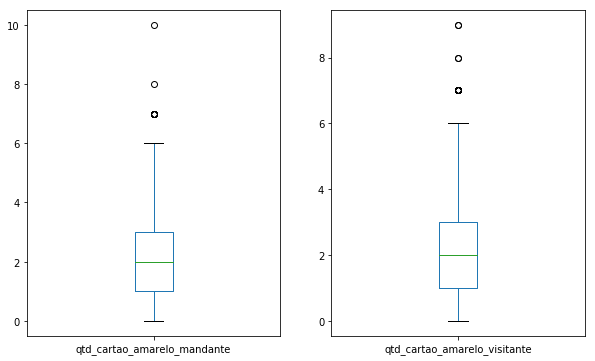

In [82]:
#Verificando os dados de cartões

cartoes=df_dados[['qtd_cartao_amarelo_mandante','qtd_cartao_amarelo_visitante']]
    
    
cartoes.plot(kind='box',figsize=(10,6),subplots=True)

In [91]:
#Criando as colunas Target

df_dados_temp['Target_mandante_amarelo'] = df_dados_temp.apply(lambda x: 
0 if x['qtd_cartao_amarelo_mandante']<=2 else 1 ,axis=1 )

df_dados_temp['Target_visitante_amarelo'] = df_dados_temp.apply(lambda x: 
0 if x['qtd_cartao_amarelo_visitante']<=2 else 1 ,axis=1 )

In [73]:
df_dados=df_dados_temp.copy(deep=True)

In [55]:
#Verificando os melhores atributos para tentar prever o total de cartões na partida

features = df_dados.drop(['ID','campeonato','rodata','data','clube_mandante','clube_visitante','qtd_cartao_amarelo_mandante',
'qtd_cartao_amarelo_visitante','qtd_cartao_vermelho_mandante','qtd_cartao_vermelho_visitante',
'total_cartoes_vermelhos','total_cartoes_amarelos','total_cartoes_partida','chave_classico','data_dt'],axis=1)

features=features.drop(features.columns[0],axis=1)
label = df_dados[['Target_mandante_amarelo']]

print(features)
print('============================')
print(label)

      total_cartoes_mandante  total_cartoes_visitante  faltas_mandante  \
0                          2                        2               20   
1                          2                        4               20   
2                          2                        2                9   
3                          3                        6               17   
4                          1                        2               17   
5                          2                        1               17   
6                          3                        1               17   
7                          1                        4               17   
8                          2                        3               10   
9                          3                        5               16   
10                         2                        2               14   
11                         2                        3               22   
12                         2          

In [ ]:
#Verificando as frequencias para as colunas Target

frequencia_mandante=df_dados['Target_mandante_amarelo'].value_counts().reset_index()
frequencia_visitante=df_dados['Target_visitante_amarelo'].value_counts().reset_index()

In [ ]:
#Verificando as frequencias para as colunas Target mandante

frequencia_mandante['frequencia']=(frequencia_mandante['Target_mandante_amarelo']/len(df_dados)).round(2)
frequencia_mandante

In [ ]:
#Verificando as frequencias para as colunas Target visitante

frequencia_visitante['frequencia']=(frequencia_visitante['Target_visitante_amarelo']/len(df_dados)).round(2)
frequencia_visitante

In [93]:
df_dados=df_dados_temp.copy(deep=True)

In [94]:
#Salvando os dados em um diretório local

df_dados.to_csv('D:\\Users\\Diogo\\Documents\\Pós Graduação\\Módulos\\TCC\\DataSets\\Futebol Brasileiro\\df_dados_fe.csv')